# Data exploration of Ligue 1 France from football-data.co.uk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
DATA_FOLDER = "./../../data/soccer/football-data.co.uk"
FOLDER_NAME_FRANCE = "F"
LIGUE_1 = "F1"

In [3]:
# agregate all seasons
df_france_ligue_1 = pd.DataFrame()
files = os.listdir(f"{DATA_FOLDER}/{FOLDER_NAME_FRANCE}")
files.sort(reverse=True)
for file in files:
    if file.startswith(LIGUE_1):
        print(file)
        df = pd.read_csv(f"{DATA_FOLDER}/{FOLDER_NAME_FRANCE}/{file}")
        df_france_ligue_1 = pd.concat([df_france_ligue_1, df], join='outer')

df_france_ligue_1

F1-2023-2024.csv
F1-2022-2023.csv
F1-2021-2022.csv
F1-2020-2021.csv
F1-2019-2020.csv
F1-2018-2019.csv
F1-2017-2018.csv
F1-2016-2017.csv
F1-2015-2016.csv
F1-2014-2015.csv
F1-2013-2014.csv
F1-2012-2013.csv
F1-2011-2012.csv
F1-2010-2011.csv
F1-2009-2010.csv
F1-2008-2009.csv
F1-2007-2008.csv
F1-2006-2007.csv
F1-2005-2006.csv
F1-2004-2005.csv
F1-2003-2004.csv
F1-2002-2003.csv
F1-2001-2002.csv
F1-2000-2001.csv
F1-1999-2000.csv
F1-1998-1999.csv
F1-1997-1998.csv
F1-1996-1997.csv
F1-1995-1996.csv
F1-1994-1995.csv
F1-1993-1994.csv


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,F1,11/08/2023,20:00,Nice,Lille,1.0,1.0,D,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,12/08/2023,16:00,Marseille,Reims,2.0,1.0,H,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F1,12/08/2023,20:00,Paris SG,Lorient,0.0,0.0,D,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F1,13/08/2023,12:00,Brest,Lens,3.0,2.0,H,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F1,13/08/2023,14:00,Clermont,Monaco,2.0,4.0,A,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


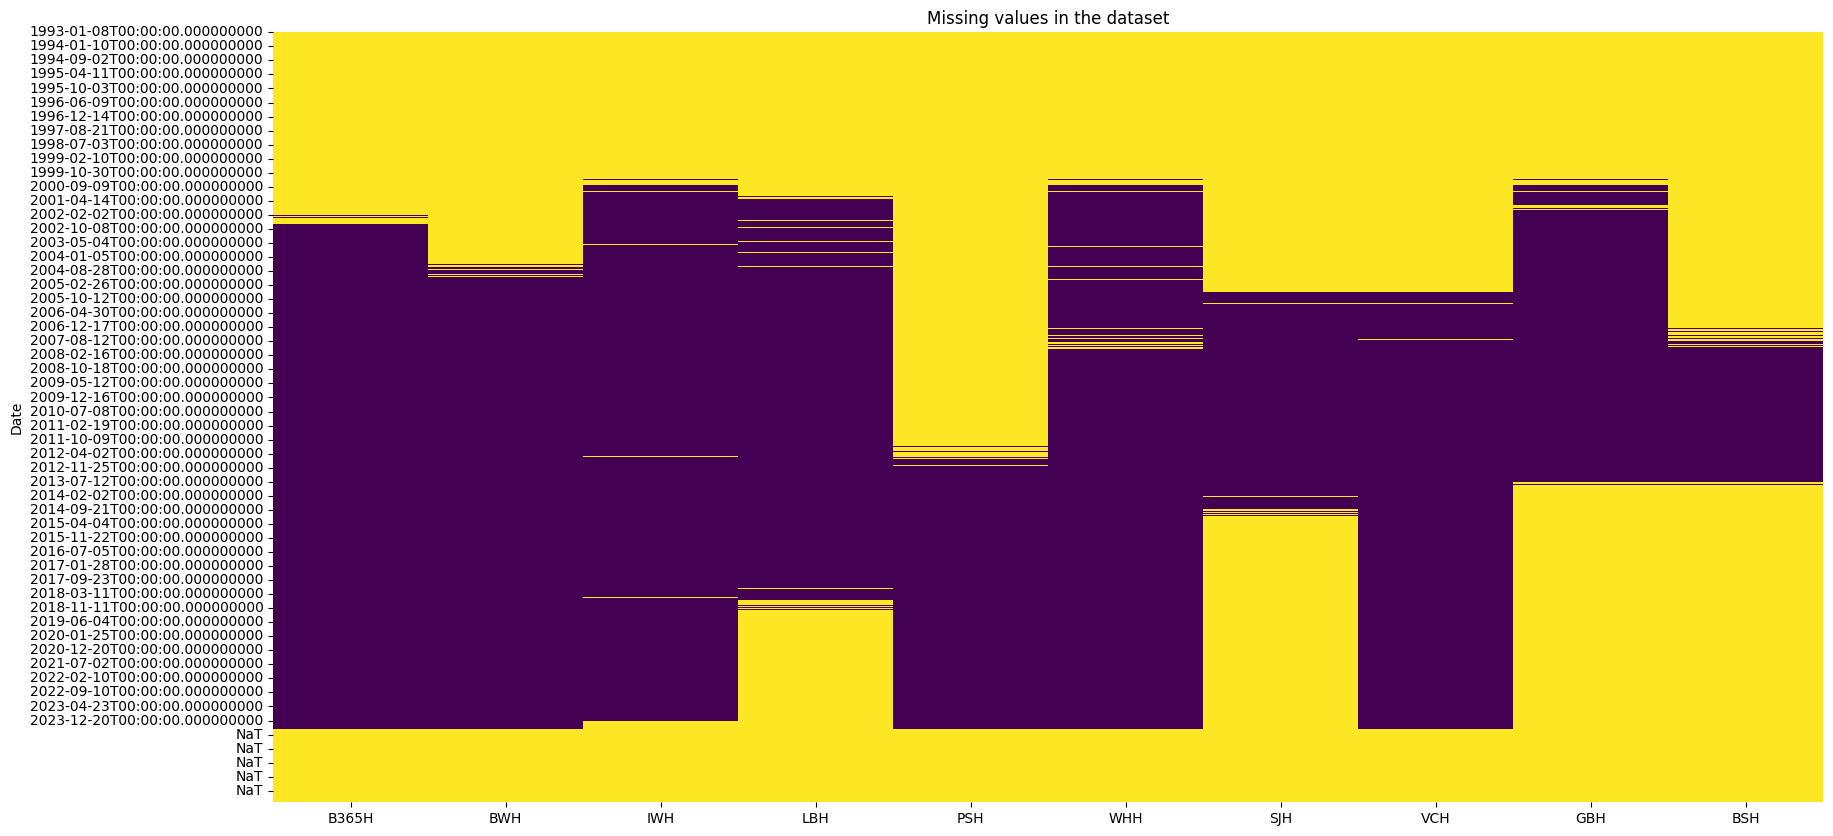

In [49]:
ar = df_france_ligue_1[['Date', 'B365H', 'BWH', 'IWH', 'LBH', 'PSH', 'WHH', 'SJH', 'VCH', 'GBH', 'BSH']]
ar = ar.set_index('Date')
ar = ar.sort_index()
ar = ar.isnull().astype(int)

plt.figure(figsize=(20, 10))
sns.heatmap(ar, cbar=False, cmap='viridis')
plt.title('Missing values in the dataset')
plt.show()

In [4]:
# remove unamed columns
df_france_ligue_1 = df_france_ligue_1.loc[:, ~df_france_ligue_1.columns.str.contains('^Unnamed')]

In [5]:
# Ensure that the date column is in datetime format
df_france_ligue_1['Date'] = pd.to_datetime(df_france_ligue_1['Date'], format='mixed')

# Extract year from date
df_france_ligue_1['year'] = df_france_ligue_1['Date'].dt.year

# Group by year and count non-null values for each column
df_count = df_france_ligue_1.groupby('year').count()


C:\Users\jdelavande\AppData\Local\Temp\ipykernel_7888\2854588931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_france_ligue_1['Date'] = pd.to_datetime(df_france_ligue_1['Date'], format='mixed')
C:\Users\jdelavande\AppData\Local\Temp\ipykernel_7888\2854588931.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_france_ligue_1['year'] = df_france_ligue_1['Date'].dt.year


In [6]:
df_france_ligue_1_null_mat = df_france_ligue_1.groupby('year').apply(lambda x: ((x.isnull().sum())/len(x))*100).astype(int)
df_france_ligue_1_null_mat

C:\Users\jdelavande\AppData\Local\Temp\ipykernel_7888\1612600244.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_france_ligue_1_null_mat = df_france_ligue_1.groupby('year').apply(lambda x: ((x.isnull().sum())/len(x))*100).astype(int)


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,LBAHA,LBAH,B365AH,SOH,SOD,SOA,SYH,SYD,SYA,year
year,,,,,,,,,,,,,,,,,,,,,
1993.0,0,0,100,0,0,0,0,0,100,100,...,100,100,100,100,100,100,100,100,100,0
1994.0,0,0,100,0,0,0,0,0,100,100,...,100,100,100,100,100,100,100,100,100,0
1995.0,0,0,100,0,0,0,0,0,44,44,...,100,100,100,100,100,100,100,100,100,0
1996.0,0,0,100,0,0,0,0,0,17,17,...,100,100,100,100,100,100,100,100,100,0
1997.0,0,0,100,0,0,0,0,0,17,17,...,100,100,100,100,100,100,100,100,100,0
1998.0,0,0,100,0,0,0,0,0,0,0,...,100,100,100,100,100,100,100,100,100,0
1999.0,0,0,100,0,0,0,0,0,0,0,...,100,100,100,100,100,100,100,100,100,0
2000.0,0,0,100,0,0,0,0,0,0,0,...,100,100,100,100,100,100,100,100,100,0
2001.0,0,0,100,0,0,0,0,0,0,0,...,100,100,100,100,100,100,55,55,55,0


In [7]:
df_france_ligue_1_2006_2024 = df_france_ligue_1[(df_france_ligue_1['year'] >= 2006) & (df_france_ligue_1['year'] <= 2024)]

In [8]:
#remove columns with more than 5% of missing values

df_france_ligue_1_2006_2024 = df_france_ligue_1_2006_2024.loc[:, df_france_ligue_1_2006_2024.isnull().mean() < .05]


In [9]:
def calculate_win(row, bookmaker="B365", result_by_outcome=False):
    
    result = row["FTR"]
    home_odd = 1/float(row[f"{bookmaker}H"])
    away_odd = 1/float(row[f"{bookmaker}A"])
    draw_odd = 1/float(row[f"{bookmaker}D"])

    result_HDA = [0, 0, 0]

    if result == "H" and home_odd > away_odd and home_odd > draw_odd:
        result_HDA[0] = 1
    if result == "D" and draw_odd > away_odd and draw_odd > home_odd:
        result_HDA[1] = 1
    if result == "A" and away_odd > home_odd and away_odd > draw_odd:
        result_HDA[2] = 1

    if result_by_outcome:
        return result_HDA
    return sum(result_HDA)

In [10]:
df_france_ligue_1_2006_2024['MEANH'] = df_france_ligue_1_2006_2024.apply(lambda x : (x['B365H'] + x['BWH'] + x['IWH'] + x['WHH'] + x['VCH'])/5, axis=1)
df_france_ligue_1_2006_2024['MEAND'] = df_france_ligue_1_2006_2024.apply(lambda x : (x['B365D'] + x['BWD'] + x['IWD'] + x['WHD'] + x['VCD'])/5, axis=1)
df_france_ligue_1_2006_2024['MEANA'] = df_france_ligue_1_2006_2024.apply(lambda x : (x['B365A'] + x['BWA'] + x['IWA'] + x['WHA'] + x['VCA'])/5, axis=1)

In [11]:
bookmakers = ['B365', 'BW', 'IW', 'WH', 'VC', 'MEAN']
accuracy_overall = []
for bookmaker in bookmakers:
    df_france_ligue_1_2006_2024[f'{bookmaker}_win'] = df_france_ligue_1_2006_2024.apply(calculate_win, axis=1, args=(bookmaker,))
    accuracy = df_france_ligue_1_2006_2024[f'{bookmaker}_win'].sum()/len(df_france_ligue_1_2006_2024[f'{bookmaker}_win'])
    print(f'{bookmaker} accuracy: {accuracy}')
    accuracy_overall.append(accuracy)

B365 accuracy: 0.5045401288810779
BW accuracy: 0.4994141769185706
IW accuracy: 0.48301113063854717
WH accuracy: 0.4917984768599883
VC accuracy: 0.5038078500292912
MEAN accuracy: 0.4872583479789104


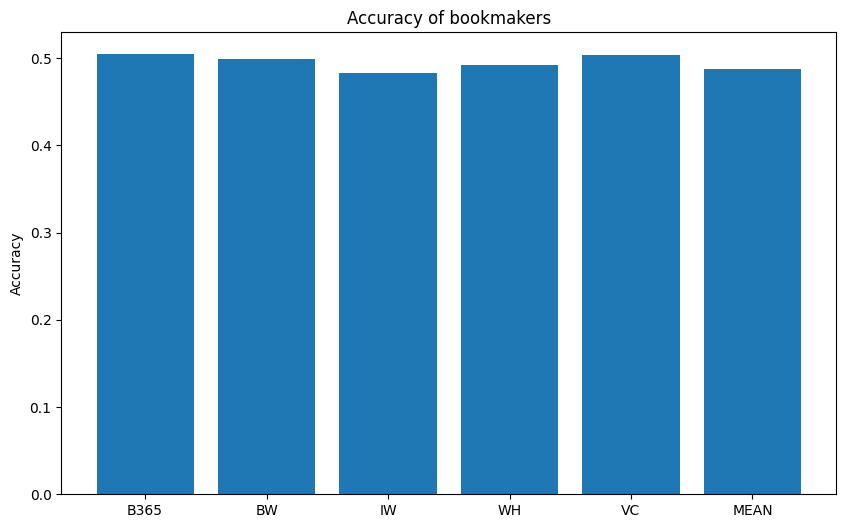

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(bookmakers, accuracy_overall)
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of bookmakers')
plt.show()

In [13]:
accuracy_home = []
accuracy_draw = []
accuracy_away = []

print('unbalanced accuracy')
for bookmaker in bookmakers:
    df_france_ligue_1_2006_2024[f'{bookmaker}_home_win'], df_france_ligue_1_2006_2024[f'{bookmaker}_draw'], df_france_ligue_1_2006_2024[f'{bookmaker}_away_win'] = zip(*df_france_ligue_1_2006_2024.apply(calculate_win, axis=1, args=(bookmaker, True)))
    accuracy_home_ = df_france_ligue_1_2006_2024[f'{bookmaker}_home_win'].sum()/len(df_france_ligue_1_2006_2024[f'{bookmaker}_home_win'])
    accuracy_home.append(accuracy_home_)
    accuracy_draw_ = df_france_ligue_1_2006_2024[f'{bookmaker}_draw'].sum()/len(df_france_ligue_1_2006_2024[f'{bookmaker}_draw'])
    accuracy_draw.append(accuracy_draw_)
    accuracy_away_ = df_france_ligue_1_2006_2024[f'{bookmaker}_away_win'].sum()/len(df_france_ligue_1_2006_2024[f'{bookmaker}_away_win'])
    accuracy_away.append(accuracy_away_)

    print(f'{bookmaker} accuracy home: {accuracy_home_}')
    print(f'{bookmaker} accuracy draw: {accuracy_draw_}')
    print(f'{bookmaker} accuracy away: {accuracy_away_}')


unbalanced accuracy
B365 accuracy home: 0.3832747510251904
B365 accuracy draw: 0.0004393673110720562
B365 accuracy away: 0.12082601054481547
BW accuracy home: 0.37932044522554187
BW accuracy draw: 0.0004393673110720562
BW accuracy away: 0.11965436438195665
IW accuracy home: 0.37111892208553016
IW accuracy draw: 0.0004393673110720562
IW accuracy away: 0.11145284124194493
WH accuracy home: 0.37390158172231985
WH accuracy draw: 0.0004393673110720562
WH accuracy away: 0.11745752782659637
VC accuracy home: 0.38283538371411835
VC accuracy draw: 0.0004393673110720562
VC accuracy away: 0.12053309900410077
MEAN accuracy home: 0.37067955477445813
MEAN accuracy draw: 0.0004393673110720562
MEAN accuracy away: 0.1161394258933802


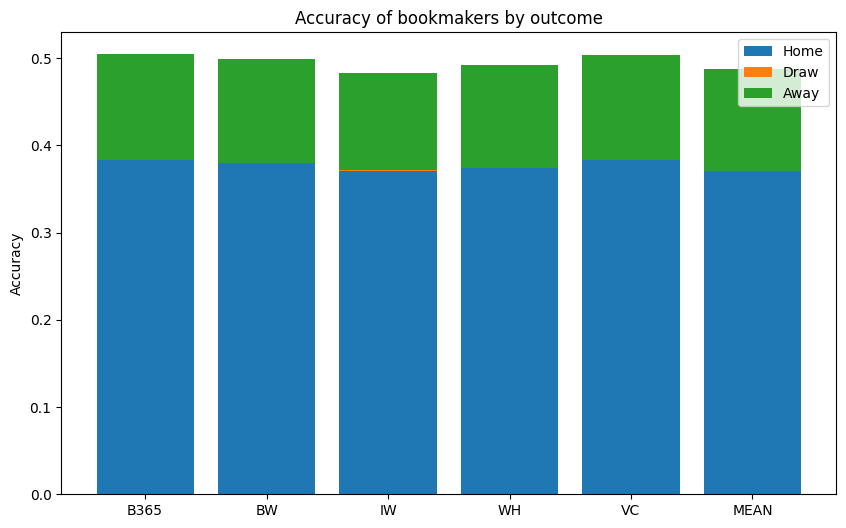

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(bookmakers, accuracy_home, label='Home')
ax.bar(bookmakers, accuracy_draw, label='Draw', bottom=accuracy_home)
ax.bar(bookmakers, accuracy_away, label='Away', bottom=np.array(accuracy_home)+np.array(accuracy_draw))

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of bookmakers by outcome')
ax.legend()
plt.show()  

In [15]:
print('balanced accuracy')
balanced_accuracy_home = []
balanced_accuracy_away = []
balanced_accuracy_draw = []
for bookmaker in bookmakers:
    df_france_ligue_1_2006_2024[f'{bookmaker}_home_win'], df_france_ligue_1_2006_2024[f'{bookmaker}_draw'], df_france_ligue_1_2006_2024[f'{bookmaker}_away_win'] = zip(*df_france_ligue_1_2006_2024.apply(calculate_win, axis=1, args=(bookmaker, True)))
    accuracy_home_ = df_france_ligue_1_2006_2024[f'{bookmaker}_home_win'].sum()/len(df_france_ligue_1_2006_2024[df_france_ligue_1_2006_2024['FTR'] == 'H'])
    balanced_accuracy_home.append(accuracy_home_)
    accuracy_draw_ = df_france_ligue_1_2006_2024[f'{bookmaker}_draw'].sum()/len(df_france_ligue_1_2006_2024[df_france_ligue_1_2006_2024['FTR'] == 'D'])
    balanced_accuracy_draw.append(accuracy_draw_)
    accuracy_away_ = df_france_ligue_1_2006_2024[f'{bookmaker}_away_win'].sum()/len(df_france_ligue_1_2006_2024[df_france_ligue_1_2006_2024['FTR'] == 'A'])
    balanced_accuracy_away.append(accuracy_away_)

    print(f'{bookmaker} accuracy home: {accuracy_home_}')
    print(f'{bookmaker} accuracy draw: {accuracy_draw_}')
    print(f'{bookmaker} accuracy away: {accuracy_away_}')

balanced accuracy
B365 accuracy home: 0.8659827928524156
B365 accuracy draw: 0.0015881418740074113
B365 accuracy away: 0.4303599374021909
BW accuracy home: 0.85704831237591
BW accuracy draw: 0.0015881418740074113
BW accuracy away: 0.42618675013041213
IW accuracy home: 0.8385175380542687
IW accuracy draw: 0.0015881418740074113
IW accuracy away: 0.39697443922796033
WH accuracy home: 0.8448047650562541
WH accuracy draw: 0.0015881418740074113
WH accuracy away: 0.41836202399582684
VC accuracy home: 0.8649900727994706
VC accuracy draw: 0.0015881418740074113
VC accuracy away: 0.42931664058424623
MEAN accuracy home: 0.8375248180013236
MEAN accuracy draw: 0.0015881418740074113
MEAN accuracy away: 0.41366718831507565


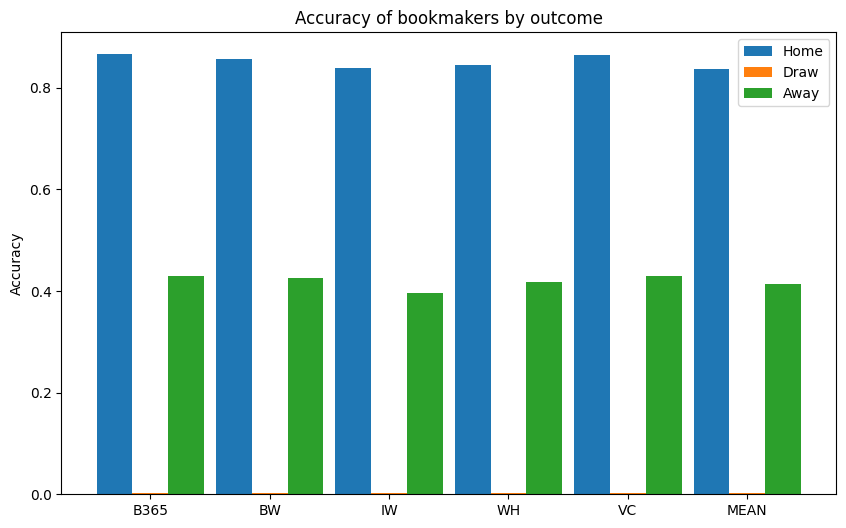

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
# Largeur des barres
bar_width = 0.3

# Positions des barres
r1 = np.arange(len(bookmakers))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

ax.bar(r1, balanced_accuracy_home, width=bar_width,label='Home')
ax.bar(r2, balanced_accuracy_draw, width=bar_width,label='Draw')
ax.bar(r3, balanced_accuracy_away, width=bar_width,label='Away')

ax.set_xticks([r + bar_width for r in range(len(bookmakers))])
ax.set_xticklabels(bookmakers)


ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of bookmakers by outcome')
ax.legend()
plt.show()

In [17]:
df_france_ligue_1_2006_2024.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD',
       'IWA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'year', 'MEANH',
       'MEAND', 'MEANA', 'B365_win', 'BW_win', 'IW_win', 'WH_win', 'VC_win',
       'MEAN_win', 'B365_home_win', 'B365_draw', 'B365_away_win',
       'BW_home_win', 'BW_draw', 'BW_away_win', 'IW_home_win', 'IW_draw',
       'IW_away_win', 'WH_home_win', 'WH_draw', 'WH_away_win', 'VC_home_win',
       'VC_draw', 'VC_away_win', 'MEAN_home_win', 'MEAN_draw',
       'MEAN_away_win'],
      dtype='object')

In [18]:
len(df_france_ligue_1_2006_2024)

6828

In [23]:
df_france_ligue_1_2006_2024_prediction['FTR']

0      D
1      H
2      D
3      H
4      A
      ..
373    H
374    H
375    D
376    H
378    H
Name: FTR, Length: 6364, dtype: object

In [35]:
# train a simple model to predict the outcome of a match logistic regression

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

#df_france_ligue_1_2006_2024_prediction = df_france_ligue_1_2006_2024.dropna()
X = df_france_ligue_1_2006_2024_prediction[['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA']]
y = df_france_ligue_1_2006_2024_prediction['FTR']






c:\Users\jdelavande\Projects\optim-sportbet\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.4799685781618225

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)



0.4791830322073841

In [45]:
clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.4799685781618225

In [43]:
# svm
from sklearn.svm import SVC

clf = SVC().fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)


0.4870384917517675

In [37]:
# prediction of bookmakers on the same test set y_test
bookmakers = ['B365', 'BW', 'IW', 'WH', 'VC']
accuracy_overall = []
# concat FTR with X_test
X_test_ = X_test.copy()
X_test_['FTR'] = y_test
for bookmaker in bookmakers:
    X_test_[f'{bookmaker}_win'] = X_test_.apply(lambda x : 'H' if x[f'{bookmaker}H'] < x[f'{bookmaker}A'] and x[f'{bookmaker}H'] < x[f'{bookmaker}D'] else ('D' if x[f'{bookmaker}D'] < x[f'{bookmaker}A'] and x[f'{bookmaker}D'] < x[f'{bookmaker}H'] else 'A'), axis=1)
    accuracy = accuracy_score(y_test, X_test_[f'{bookmaker}_win'])
    print(f'{bookmaker} accuracy: {accuracy}')

B365 accuracy: 0.48625294579732914
BW accuracy: 0.48153967007069914
IW accuracy: 0.4807541241162608
WH accuracy: 0.4838963079340141
VC accuracy: 0.4831107619795758
